In [10]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [35]:
path = '../../output/weights/p_date=2022-11-19-12_55_28/log.json'
#path = "C:/Users/elias/OneDrive/Desktop/log.json"

with open(path, 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

4001 records
dict_keys(['loss', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [36]:
slice = 200000

# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-slice:]
mean_loss = stat.mean(loss) + 100000
loss_filtered = { k: v for k, v in enumerate(loss) if v <= mean_loss }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-slice:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ][-slice:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"][-slice:]) if str(v) != "nan" }

In [37]:
def plot(data, title, labelX, labelY):
    interval = 1000
    interval_min_max = 2_000
    
    
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : round(stat.mean(list(data.values())[i:i+interval+1]), 1) for i in range(0, len(data.values()), interval) }
    min_line = { i + index_0 : round(min(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    max_line = { i + index_0 : round(max(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.plot(list(min_line.keys()), list(min_line.values()), color="orange")
    plt.plot(list(max_line.keys()), list(max_line.values()), color="orange")
    plt.hlines(y=0, xmin=0, xmax=max(data.keys()), linewidth=2, color='purple')
    
    plt.title(title)
    
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    #print(f"Moving Average (simple): {moving_average}")
    print()
    #print(f"Moving Average: {percent_list}")
    print("Values: " + " > ".join(map(str, moving_average.values())))
    print()
    
    print(f"Minimum (last {interval}): {min(list(data.values())[:-interval])}")
    print(f"Average (last {interval}): {np.mean(list(data.values())[:-interval])}")
    print(f"Maximum (last {interval}): {max(list(data.values())[:-interval])}")

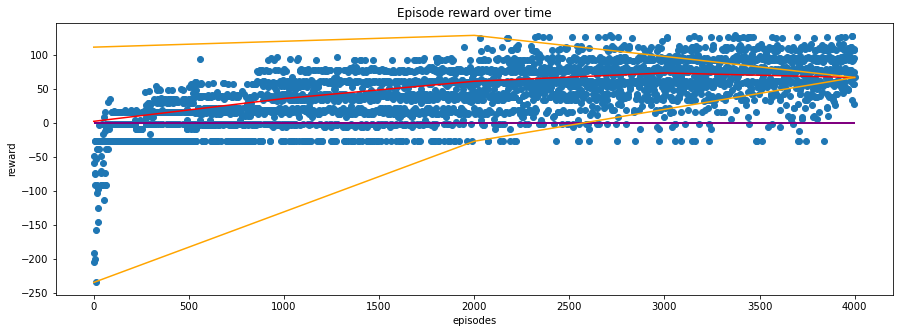

Maximum: 129.30072998706126
Average: 43.50320683933726

Values: 2.5 > 36.1 > 61.6 > 73.8 > 67.2

Minimum (last 1000): -235.12121212121212
Average (last 1000): 33.405036272403834
Maximum (last 1000): 129.30072998706126


In [38]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

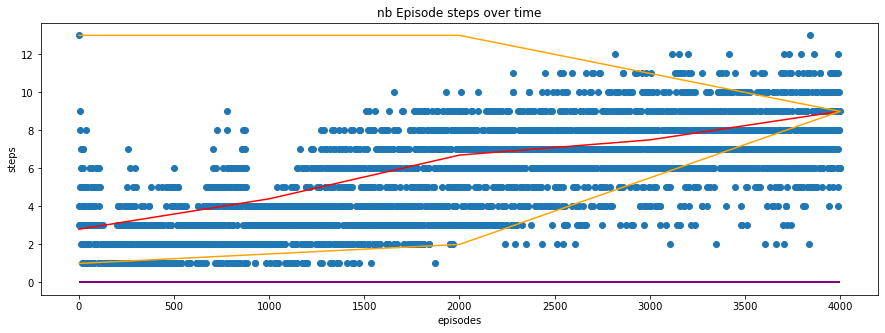

Maximum: 13
Average: 5.364158960259935

Values: 2.8 > 4.4 > 6.7 > 7.5 > 9

Minimum (last 1000): 1
Average (last 1000): 4.638787070976341
Maximum (last 1000): 13


In [39]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

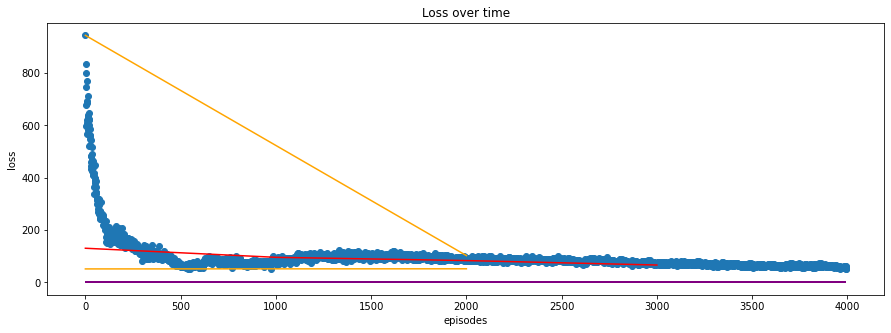

Maximum: 944.279296875
Average: 94.28587758872327

Values: 130.7 > 96.0 > 83.6 > 66.6

Minimum (last 1000): 51.678829193115234
Average (last 1000): 103.51955840758768
Maximum (last 1000): 944.279296875


In [40]:
plot(loss_filtered, "Loss over time", "episodes", "loss")

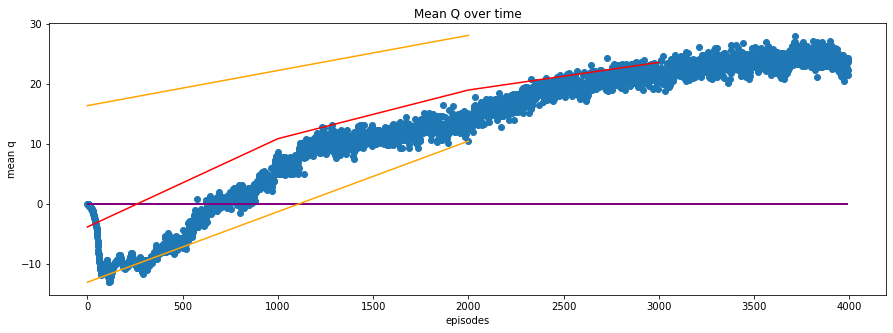

Maximum: 28.05381202697754
Average: 12.401086638550284

Values: -3.8 > 10.9 > 19.0 > 23.6

Minimum (last 1000): -13.030778884887695
Average (last 1000): 8.674627123628113
Maximum (last 1000): 24.346359252929688


In [41]:
plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

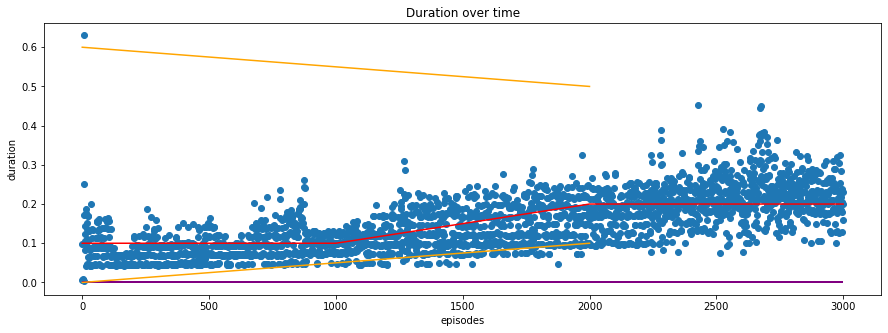

Maximum: 0.6303008999999999
Average: 0.14420505158280578

Values: 0.1 > 0.1 > 0.2 > 0.2

Minimum (last 1000): 0.0041474000000008004
Average (last 1000): 0.11213663388305851
Maximum (last 1000): 0.6303008999999999


In [33]:
plot(duration, "Duration over time", "episodes", "duration")